<H2>課題2: 予測モデルの作成</H2>
<p>本課題では課題1と同じデータを用いてデータ分析の流れを確認します。</p>
<p>2章で学んだ内容を踏まえ、各セルに入っているコメントを実行するコードを記入してください。</p>

<H2>1. 必要なモジュールを読み込む</H2>

In [20]:
import copy

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

matplotlib.style.use('ggplot')

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

%matplotlib inline

<H2>2. データの読み込み</H2>
<p> pandasにはread_csvという関数が用意されており、それを用いれば簡単にCSVファイルを読み込むことができます</p>
<p>データはdatasetフォルダ直下にある"kaggle_housing_price.csv"を使用します。</p>

In [21]:
# データ読み込み
dataset = pd.read_csv('kaggle_housing_price.csv')

In [22]:
# データを最初の5行だけ表示
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<h2>3. データの前処理</h2>

In [23]:
# 今回の解析では下記の列を使用することとします
target_col = 'SalePrice'
feature_cols = ['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
               'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
                'BedroomAbvGr', 'KitchenAbvGr', 'GarageCars']

In [24]:
# target_colとfeature_colsをarrayにして、それぞれをY、Xとする
Y=np.array(dataset[target_col])
X=np.array(dataset[feature_cols])

In [25]:
# DataをTrain　: Test = 7　:　3に分ける
X_train, X_test, Y_train, Y_test = \
 train_test_split(X, Y, test_size=0.3, random_state=12)

In [26]:
# Trainをさらに 7:3 に分ける
X_train1, X_train2, Y_train1, Y_train2 = \
 train_test_split(X_train, Y_train, test_size=0.3, random_state=12)
#アルゴリズム選択、変数選択、ハイパーパラメータ選択のチューニングなどで精度を確認するために分けている


<H2>4. アルゴリズムの選択 </H2>
<p>回帰分析、決定木、ランダムフォレストを比較します</p>

In [27]:
# 回帰分析を実施しMSEを算出
lm = LinearRegression()
lm.fit(X_train1, Y_train1)
Y_pred2 = lm.predict(X_train2)
lm_mse = mean_squared_error(Y_train2, Y_pred2)
print('LinearRegression MSE', lm_mse)


LinearRegression MSE 954674413.3273504


In [28]:
#決定木を実行し、MSEを算出
dt = DecisionTreeRegressor()
dt.fit(X_train1, Y_train1)
Y_pred2 = dt.predict(X_train2)
dt_mse = mean_squared_error(Y_train2, Y_pred2)
print('DT MSE', dt_mse)

DT MSE 1443563964.583062


In [29]:
# ランダムフォレストを実行し、MSEを算出
rf = RandomForestRegressor(random_state=12)
np.array(Y_train1)
rf.fit(X_train1, Y_train1)
Y_pred2 = rf.predict(X_train2)
rf_mse = mean_squared_error(Y_train2, Y_pred2)
print('RandomForest MSE:', rf)


RandomForest MSE: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=12, verbose=0, warm_start=False)


In [30]:
print(rf_mse)

821881960.4219254


In [31]:
Y_train1

array([223500, 143000, 117000, 140000, 228000, 284000, 140000, 115000,
       339750, 133000, 143000, 146800, 105500, 230000, 556581, 137450,
       299800, 237500, 367294, 276000, 189950, 241000, 109500, 179500,
       175900, 138800, 146000, 114500, 175500, 250000, 109900, 135960,
       159500, 274900, 129000, 125000, 256000, 202900, 100000, 178000,
       124900, 250000, 213000, 127000, 117000, 138000, 171900, 254900,
        60000, 141000, 171000, 129900, 176000, 230000, 135000, 374000,
       213490, 318000, 120000, 159000, 239000, 183900, 110000, 170000,
       128000, 207500, 236000, 130500, 118000, 133700, 122000, 272000,
       208500, 145500,  80000, 145000, 359100, 179000, 137000, 196500,
       129000, 165000,  88000, 120000, 268000, 340000,  94000, 200000,
       144000, 174000, 145000, 244000,  72500, 155000, 119000, 199900,
       132000, 155000, 320000, 190000, 226000, 187500, 108000, 176500,
       325000, 166000, 123600, 625000, 173000, 119500, 220000, 184000,
      

<H2>5. 変数の選択</H2>

In [32]:
# 変数増加法を実行する関数
def get_gfs_feature_indices(X, Y, features, clf):
    X_train_, X_test_, Y_train_, Y_test_ = \
        train_test_split(X, Y, test_size=0.3, random_state=1234)
    feature_indices = {feature: idx for idx, feature in enumerate(features)}
    features = set(features)
    last_mse = np.inf
    chosen_features = set()
    while len(chosen_features) < len(features):
        mse_features = []
        for feature in (features - chosen_features):
            candidates = chosen_features.union(set([feature]))
            indices = [feature_indices[feature] for feature in candidates]
            clf.fit(X_train_[:, indices], Y_train_)
            Y_pred = clf.predict(X_test_[:, indices])
            mse = mean_squared_error(Y_test_, Y_pred)
            mse_features += [(mse, feature)]
        mse, feature = min(mse_features)
        if mse >= last_mse:
            break
        last_mse = mse
        print('NewlY Added Feature: {},\tMSE Score: {}'.format(feature, mse))
        chosen_features.add(feature)
    return [feature_indices[feature] for feature in chosen_features]

In [33]:
# 上記関数を使用して変数増加法を実行し、MSEを算出
selected_feature_index = \
get_gfs_feature_indices(X=X_train, Y=Y_train, features=feature_cols, clf=RandomForestRegressor(random_state=1234))


NewlY Added Feature: OverallQual,	MSE Score: 1553565643.9704814
NewlY Added Feature: GarageCars,	MSE Score: 1228797598.6873274
NewlY Added Feature: GrLivArea,	MSE Score: 974023939.4343857
NewlY Added Feature: TotalBsmtSF,	MSE Score: 809429158.3424864
NewlY Added Feature: BsmtFinSF1,	MSE Score: 738387674.9587477
NewlY Added Feature: YearBuilt,	MSE Score: 698717993.8159754
NewlY Added Feature: HalfBath,	MSE Score: 669713691.5382446
NewlY Added Feature: 2ndFlrSF,	MSE Score: 664652774.2209917
NewlY Added Feature: OverallCond,	MSE Score: 657000208.8618894
NewlY Added Feature: BedroomAbvGr,	MSE Score: 600197681.1252444


<H2>6. ハイパーパラメータのチューニング</H2>

In [44]:
# 木の数：[10, 50, 100], 木の深さ:[5, 10, 50]でパラメータをチューニング
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
params = {"n_estimators": [10, 50, 100], "max_depth": [5, 10, 50]}
gscv = GridSearchCV(rf, param_grid=params, verbose=1, cv=3, scoring='neg_mean_squared_error')
gscv.fit(X_train1[:, selected_feature_index], Y_train1)
gscv.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    3.3s finished


{'max_depth': 50, 'n_estimators': 100}

In [45]:
# チューニング後のランダムフォレストで再びMSEを算出し、精度を確認
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train1[:,selected_feature_index ], Y_train1)
Y_pred2 = rf.predict(X_train2[:, selected_feature_index])
rf_mse = mean_squared_error(Y_train2, Y_pred2)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  849312341.5951865


<H2>7. モデルの評価</H2>

In [48]:
# Test dataを用いてMSEを算出し、予測精度を確認
rf = RandomForestRegressor(n_estimators=100, max_depth=50, random_state=1234)
rf.fit(X_train[:, selected_feature_index], Y_train)
Y_pred_on_test = rf.predict(X_test[:, selected_feature_index])
rf_mse = mean_squared_error(Y_test, Y_pred_on_test)
print('RandomForest MSE: ', rf_mse)

RandomForest MSE:  1554466426.9424717


<H2>8. エラー分析</H2>

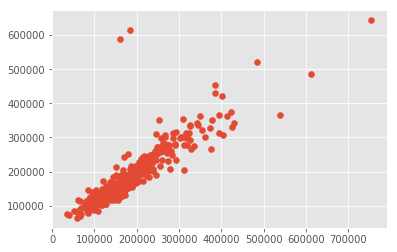

In [50]:
# 横軸：実際の成約価格、縦軸：予測した成約価格で散布図を作成し予測の誤差を確認
plt.scatter(Y_test, Y_pred_on_test)

#横軸に政界の成約価格、縦軸に予測した成約価格をとると、どのあたりの価格帯で誤差が大きくなるかがわかります。
#この図を見ると、価格が大きくなるにつれて外れているので、高級住宅の特徴を捉える変数が必要かもしれないといった
#新しい仮説を立てることができる。
#(※本の本文抜出)

Mean:  -0.027398865251236117
std:  0.2328357338966663


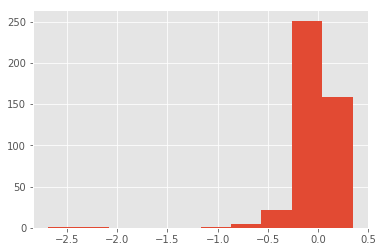

In [52]:
# 実際の成約価格と予測価格の誤差率をヒストグラムで表示
error_rate = (Y_test - Y_pred_on_test)/Y_test
plt.hist(error_rate)
print('Mean: ', np.mean(error_rate))
print('std: ', np.std(error_rate))

#これをみると茣蓙が±ゼロ付近に集中しているが、-0.5以上開きがあるものがいくつかある。
#これらが何かを調査して、分析するとより精度の高いモデルを作れるようになる。